# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd
import os.path
from pandas.util.testing import assert_frame_equal
import csv

# used for handling dates
import datetime
from datetime import datetime, date,timedelta

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Set formattign options
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

/home/atamayo/anaconda3/envs/adv_pythonFinal/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


# Request ticker name from user and generate list of trading days

In [2]:
userTicker = input("Enter ticker name: ")
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
print(type(userTicker))

Enter ticker name: FBND
<class 'str'>


In [3]:
#Request the closing day name from user
daynameTemp = str(input("Ente the day name for market close ex :"))

Ente the day name for market close ex :Wednesday


In [4]:
# Function to select trading day and return date in correct date format 
def get_previous_byday(dayname, start_date=None):
    if start_date is None:
        start_date = datetime.today()
        day_num = start_date.weekday()
        day_num_target = weekdays.index(dayname)
        days_ago = (7 + day_num - day_num_target) % 7
    if days_ago ==0 and start_date.hour >= 13:
        return start_date
    if days_ago == 0:
        days_ago = 7
    target_date = start_date - timedelta(days=days_ago)
    return target_date

In [5]:
#Display the target close date to user
print("This is the target date:", get_previous_byday(daynameTemp))
dateText = get_previous_byday(daynameTemp)

This is the target date: 2020-05-13 16:24:49.271819


In [6]:
#Create Year, Month, Day date variable
myYear = str(dateText.year)
myMonth = str(dateText.month)
myDay = str(dateText.day)

# Input stock ticker names from a csv file

In [7]:
#CSV file is read from current working directory
#Import os to use abs file path
import os

#user current dir
cwd = os.getcwd()

new_u_file = 'complete_ticker_list.csv'

#complete path file
abs_file_path = os.path.join(cwd,new_u_file)

if os.path.isfile(abs_file_path):
    print("File found")
try:
    fhand = open(abs_file_path, 'r')
except:
    print('File cannot be opened:', new_u_file)
    #exit()

tickers = list()
for line in fhand:
    line = line.rstrip()
    if len(line) == 0 : continue
    tickers.append(line)

File found


In [8]:
print(tickers)

['TIX_symbols', 'AACG', 'AAL', 'AAME', 'AAOI', 'AAON', 'AAPL', 'AAWW', 'AAXJ', 'AAXN', 'ABCB', 'ABEO', 'ABIO', 'ABMD', 'ABTX', 'ABUS', 'ACAD', 'ACAM', 'ACAMU', 'ACAMW', 'ACBI', 'ACCP', 'ACER', 'ACGL', 'ACGLO', 'ACGLP', 'ACHC', 'ACHV', 'ACIA', 'ACIU', 'ACIW', 'ACLS', 'ACMR', 'ACNB', 'ACOR', 'ACRS', 'ACRX', 'ACST', 'ACT', 'ACTG', 'ACTT', 'ACTTU', 'ACTTW', 'ACWI', 'ACWX', 'ADAP', 'ADBE', 'ADES', 'ADI', 'ADIL', 'ADILW', 'ADMA', 'ADMP', 'ADMS', 'ADP', 'ADPT', 'ADRE', 'ADRO', 'ADSK', 'ADTN', 'ADUS', 'ADVM', 'ADXN', 'ADXS', 'AEGN', 'AEHR', 'AEIS', 'AEMD', 'AERI', 'AESE', 'AEY', 'AEYE', 'AEZS', 'AFH', 'AFIN', 'AFINP', 'AFMD', 'AFYA', 'AGBA', 'AGBAR', 'AGBAU', 'AGBAW', 'AGEN', 'AGFS', 'AGFSW', 'AGIO', 'AGLE', 'AGMH', 'AGNC', 'AGNCM', 'AGNCN', 'AGNCO', 'AGNCP', 'AGND', 'AGRX', 'AGTC', 'AGYS', 'AGZD', 'AHCO', 'AHI', 'AHPI', 'AIA', 'AIH', 'AIHS', 'AIKI', 'AIMC', 'AIMT', 'AINV', 'AIQ', 'AIRG', 'AIRR', 'AIRT', 'AIRTP', 'AIRTW', 'AKAM', 'AKBA', 'AKCA', 'AKER', 'AKRO', 'AKRX', 'AKTS', 'AKTX', 'ALAC', 

# Obtaining and organizing stock data from Yahoo Finance using pandas datareader

In [9]:
# import data reader package
import pandas_datareader as pdr

#def get(tickers, startdate, enddate):
#    def data(ticker):
#        return(pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
#    datas=map(data,tickers)
#    return(pd.concat(datas,keys=tickers,names=['Ticker','Date']))
#all_data=get(tickers, datetime(2020,4,7), datetime(int(myYear),int(myMonth),int(myDay)))

In [10]:
# read data from Yahoo! Finance for a specific 
# stock specified by ticker and between the start and end dates
def get_stock_data(ticker, start, end):
#    # read the data
    data = pdr.get_data_yahoo(ticker, start, end)
    # rename this column
#    data.insert(0, "Ticker", ticker)
    return data

In [11]:
# request the three years of data for SAGE
start = datetime(2020, 4, 11)
end = datetime(int(myYear),int(myMonth),int(myDay))
#raw = get_stock_data(userTicker, start, end)[:5]
raw = get_stock_data(userTicker, start, end)
print(end)

2020-05-13 00:00:00


In [12]:
raw.describe()

,High,Low,Open,Close,Volume,Adj Close
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,53.024261,52.725000,52.898696,52.874565,267260.869565,52.811302
std,0.161449,0.185943,0.172871,0.179968,103382.518916,0.154934
min,52.799999,52.490002,52.540001,52.520000,146300.000000,52.398823
25%,52.895000,52.580002,52.824999,52.785000,205300.000000,52.742500
50%,52.992001,52.700001,52.900002,52.860001,240700.000000,52.810001
75%,53.094999,52.875000,53.000000,52.969999,313750.000000,52.918751
max,53.396000,53.080002,53.200001,53.240002,554800.000000,53.107056


# CSV file write and read for Statistical Modeling function from Victor

In [13]:
#Hard coded file name to use for csv output file
myFile = "C:\\Users\\marma\\Documents\\investments\\csv\\"+userTicker+"_"+myMonth+"_"+myDay+".csv"

In [14]:
print(myFile)

C:\Users\marma\Documents\investments\csv\FBND_5_13.csv


In [15]:
raw.to_csv(myFile)

In [16]:
#Read back csv file data by column index
x = pd.read_csv(myFile,usecols=['Low'])
y = pd.read_csv(myFile,usecols=['High'])


#print(x)
#print(x['Date'])
LarrX = []
HarrY = []
x1 = x.values
y1 = y.values


xx2 = []
yy3 = []

for n in x1:
    for m in n:
        xx2.append(m)
for t in y1:
    for m in t:
        yy3.append(m)

#for k,v in x.values():
    #print(type(v))
    #LarrX.append(v)
    #for items in v:
        #print(items)
#for k,v in y.items():
   #HarrY.append(v)
#print(len(LarrX))
#print(len(HarrY))

#for items in LarrX:
   # print(items)
#xx = [1,5,6,7,8]
#$yy = [1,6,7,8,9]

print(xx2)

[52.58000183105469, 52.91999816894531, 53.06999969482422, 53.0, 53.08000183105469, 52.84000015258789, 52.5, 52.4900016784668, 52.9000015258789, 52.86000061035156, 52.7400016784668, 52.58000183105469, 52.88999938964844, 52.58000183105469, 52.72999954223633, 52.72999954223633, 52.70000076293945, 52.56000137329102, 52.540000915527344, 52.599998474121094, 52.5, 52.6150016784668, 52.66999816894531]


In [17]:
#Extract 'Adj Close' column



In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

'''
Note: these were testing function left for archiving
def test():
    x = np.array([5, 15, 25, 35, 45, 55])
    y = np.array([5, 20, 14, 32, 22, 38])
    return x, y

def arrary_test():
    x = np.array([5, 15, 25, 35, 45, 55])
    y = np.array([5, 20, 14, 32, 22, 38])
    data = y
    df = pd.DataFrame(data, index = x)
    x1 = df.index.values
    y1 = df.values
    y2 = list()
    for n in y1:
        for m in n:
            y2.append(m)
    y2 = np.array(y2)
    return x1, y2
'''

#takes a dateframe and returns two arrays, index_setting = 0 means two columns from df. 1 means index + column
#warning, you need a index and a single column for 1, or only two colums(index ok) for 0 or code will not work
def dataframe_to_array(df, index_setting):
    #if data is in a colum and an index
    if index_setting == 1:
        #get the index from the dataframe
        x1 = df.index.values
        #get the values from the dataframe, gives and array of arrays
        y1 = df.values
        y2 = list()
        #transfrom the array of arrays into a single array
        for n in y1:
            for m in n:
                y2.append(m)
        y2 = np.array(y2)
        #return
        return x1, y2
    #if data in is two columns
    else:
        #turn dataframe into and array of arrays
        set_array = df.to_numpy()
        #splits array into two arrays of a single array
        bisector = np.array_split(set_array, 2)
        count = 0
        #define x1 and y1
        for n in bisector:
            if count == 0:
                x1 = n
                count += 1
            else:
                y1 = n
        #reverts back array of array into a just an array
        for n2 in x1:
            x1 = n2
        for n3 in y1:
            y1 = n3
        #return
        return x1, y15, 15, 25, 35, 45, 55

#turns a csv file into a dataframe
#warning, not tested if it works
def csv_into_dataframe(csv_file):
    df = pd.read_csv(csv_file)
    return df

#builds a fuction that returns a predicted y, x1 and y1 are arrays, power refers to highest polynomial degree in model
#Note: this function is outdated now
def predict_dependent(x1, y1, power):
    #build a sorted array for ploting later
    x2 = x1
    np.sort(x2)
    #reshape the x1 and x2 arrays to work for linear regression fitting
    x1 = x1.reshape((-1,1))
    x2 = x2.reshape((-1,1))
    #determine a model type
    if power > 1 and power % 1 == 0:
        #rebulid again to work with polynomial modeling
        x1_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x1)
        model = LinearRegression().fit(x1_, y1)
        x2_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x2)
        #build predictive array
        prediction = model.predict(x2_)
    #linear is default
    else:
        #bulids a model using two arrays
        model = LinearRegression().fit(x1,y1)
        prediction = model.predict(x2)
    #return, note that both x2 and prediction are in order
    return prediction

#take in a set and return a set with the sorted x and new predicted y, power refers to highest polynomial degree in model
#Note: this function is outdated now
def regression_transform(x1, y1, power):
    #build a model
    x2 = x1
    np.sort(x2)
    x3 = x2
    x1 = x1.reshape((-1,1))
    x2 = x2.reshape((-1,1))
    #x3 is to have a x2_ that is not modified for polynomial features for indexing
    #this next part is slimilar to predict_dependent()
    if power > 1 and power % 1 == 0:
        x1_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x1)
        model = LinearRegression().fit(x1_, y1)
        x2_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x2)
        y2 = model.predict(x2_)
    else:
        model = LinearRegression().fit(x1,y1)
        y2 = model.predict(x2)
    data = y2
    #bulid a dataframe with y2 as data and x3 as an index
    set_rebuild = pd.DataFrame(data, index = x3)
    #returns the dataset
    return set_rebuild 

#scores how well the model fits that data with a R^2 score, with is from 0 to 1
def prediction_score(x1, y1, power):
    #slimilar structure as above, but no need to organize
    x1 = x1.reshape((-1,1))
    if power > 1 and power % 1 == 0:
        x1_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x1)
        model = LinearRegression().fit(x1_, y1)
        #model.score returns a R^2 value, which rates fit from 0 to 1
        score = model.score(x1_, y1)
    else:
        model = LinearRegression().fit(x1,y1)
        score = model.score(x1, y1)
    #return
    return score

#this is the primary function every is built up to, first three are same as above, next three build prediction range
def ranged_regress_transform(x1, y1, power, value_min, value_max, step):
    count = value_min
    x2 = list()
    #create list that starts at min, ends a max, step effects how many calculations are done
    while count <= value_max:
        x2.append(count)
        count += step
    #change the list into an array
    x3 = np.array(x2)
    x3 = x3.reshape((-1,1))
    x1 = x1.reshape((-1,1))
    #also slimilar to above code
    if power > 1 and power % 1 == 0:
        x1_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x1)
        model = LinearRegression().fit(x1_, y1)
        x3_ = PolynomialFeatures(degree=power, include_bias=False).fit_transform(x3)
        y2 = model.predict(x3_)
    else:
        model = LinearRegression().fit(x1,y1)
        y2 = model.predict(x3)
    data = y2
    #build the dataframe with good graphing data
    new_build = pd.DataFrame(data, index = x2)
    #return the dataframe
    return new_build

#uses all of the above code, takes a dataframe and returns a dataframe with predicted values
def ranged_df_regress_trans(df, index_setting, power, value_min, value_max, step):
    x1, y1 = dataframe_to_array(df, index_setting)
    final_build = ranged_regress_transform(x1, y1, power, value_min, value_max, step)
    return final_build

#same as above with with scoring
def df_regress_scoring(df, index_setting, power):
    x1, y1 = dataframe_to_array(df, index_setting)
    score = prediction_score(x1, y1, power)
    return score

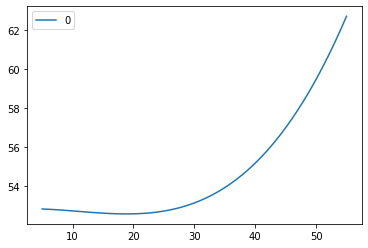

In [19]:

g = np.array(xx2)
f = np.array(yy3)
#a = np.array([1,2,3,4,5,6])
#b = np.array([3,5,9,14,21,34])
run = ranged_regress_transform(g, f, 3, 5, 55, 1)
run2 = ranged_df_regress_trans(x,1,3,5,55,1)
#run.plot()
run2.plot()


In [20]:
# gets data for multiple stocks
# tickers: a list of stock symbols to fetch
# start and end are the start end end dates
#def get_data_for_multiple_stocks(tmptickers, start, end):
    # we return a dictionary
 #   stocks = dict()
    # loop through all the tickers
 #   for ticker in tmptickers:
 #       # get the data for the specific ticker
 #       s = get_stock_data(ticker, start, end)
        # add it to the dictionary
#        stocks[ticker] = s
    # return the dictionary
#    return stocks

In [21]:
# get the data for all the stocks that we want
#print(tickers)
#raw = get_data_for_multiple_stocks(tickers, start, end)

['TIX_symbols', 'AACG', 'AAL', 'AAME', 'AAOI', 'AAON', 'AAPL', 'AAWW', 'AAXJ', 'AAXN', 'ABCB', 'ABEO', 'ABIO', 'ABMD', 'ABTX', 'ABUS', 'ACAD', 'ACAM', 'ACAMU', 'ACAMW', 'ACBI', 'ACCP', 'ACER', 'ACGL', 'ACGLO', 'ACGLP', 'ACHC', 'ACHV', 'ACIA', 'ACIU', 'ACIW', 'ACLS', 'ACMR', 'ACNB', 'ACOR', 'ACRS', 'ACRX', 'ACST', 'ACT', 'ACTG', 'ACTT', 'ACTTU', 'ACTTW', 'ACWI', 'ACWX', 'ADAP', 'ADBE', 'ADES', 'ADI', 'ADIL', 'ADILW', 'ADMA', 'ADMP', 'ADMS', 'ADP', 'ADPT', 'ADRE', 'ADRO', 'ADSK', 'ADTN', 'ADUS', 'ADVM', 'ADXN', 'ADXS', 'AEGN', 'AEHR', 'AEIS', 'AEMD', 'AERI', 'AESE', 'AEY', 'AEYE', 'AEZS', 'AFH', 'AFIN', 'AFINP', 'AFMD', 'AFYA', 'AGBA', 'AGBAR', 'AGBAU', 'AGBAW', 'AGEN', 'AGFS', 'AGFSW', 'AGIO', 'AGLE', 'AGMH', 'AGNC', 'AGNCM', 'AGNCN', 'AGNCO', 'AGNCP', 'AGND', 'AGRX', 'AGTC', 'AGYS', 'AGZD', 'AHCO', 'AHI', 'AHPI', 'AIA', 'AIH', 'AIHS', 'AIKI', 'AIMC', 'AIMT', 'AINV', 'AIQ', 'AIRG', 'AIRR', 'AIRT', 'AIRTP', 'AIRTW', 'AKAM', 'AKBA', 'AKCA', 'AKER', 'AKRO', 'AKRX', 'AKTS', 'AKTX', 'ALAC', 

In [22]:
# take a peek at the data for SAGE
#raw[userTicker][:5]
#raw[userTicker]

# Work with a single ticker since read in list is currupting the dataframe -generate time-series chart

In [23]:
#Open close change
raw['Change']=raw.Open - raw.Close

In [24]:
raw['Pct_Chg']=raw.Change/raw.Open

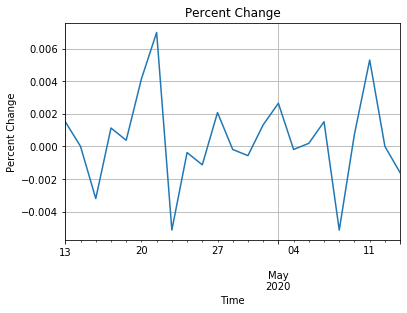

In [25]:
# create a time-series chart with a title and specific 
# x and y axis labels

# title is set in the .plot() method as a parameter
raw['Pct_Chg'].plot(title='Percent Change', grid=True)
#userPDTicker['Pct_Chg'].plot(grid=True)
# explicitly set the x and y axes labels after the .plot()
plt.xlabel('Time')
plt.ylabel('Percent Change');

In [26]:
# given the dictionary of data frames,
# pivots a given column into values with column
# names being the stock symbols
def pivot_tickers_to_columns(raw, column):
    items = []
    # loop through all dictionary keys
    for key in raw:
        # get the data for the key
        data = raw[key]
        # extract just the column specified
        subset = data[["Ticker", column]]
        # add to items
        items.append(subset)
    
    # concatenate all the items
    combined = pd.concat(items)
    # reset the index
    ri = combined.reset_index()
    # return the pivot
    return ri.pivot("Date", "Ticker", column)

In [27]:
# do the pivot
close_px = pivot_tickers_to_columns(raw, "Close")
# peek at the result
close_px[:5]

KeyError: "None of [Index(['Ticker', 'Close'], dtype='object', name='Date')] are in the [index]"

# Plotting time-series prices

In [ ]:
# plot the closing prices of SAGE
close_px[userTicker].plot();

In [ ]:
# plot the closing prices of INO
#close_px[userTicker].plot();

In [ ]:
# plot MSFT vs AAPL on the same chart
#close_px[['SAGE', userTicke]].plot();

In [ ]:
# pivot the volume data into columns
volumes = pivot_tickers_to_columns(raw, "Volume")
volumes.tail()

In [ ]:
# plot the volume for MSFT
userTicker_volume = volumes[[userTicker]]
plt.bar(INO_volume.index, userTicker_volume[userTicker])
plt.gcf().set_size_inches(15,8)

In [ ]:
# draw the price history on the top
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(close_px['userTicke'].index, close_px['userTicke'], 
         label='userTicke Close')
plt.title('userTicke Close Price 2012 - 2014')
plt.legend(loc=2)

# and the volume along the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(userTicke_volume.index, userTicke_volume['userTicke'])
plt.title('userTicke Trading Volume 2012 - 2014')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

# Calculating simple daily percentage change

In [ ]:
# calculate daily percentage change
daily_pc = close_px / close_px.shift(1) - 1
daily_pc[:5]

In [ ]:
# check the percentage on 2012-01-05
close_px.loc['2017-01-05'][userTicke] / \
    close_px.loc['2017-01-04'][userTicke] -1

In [ ]:
# plot daily percentage change for INO
daily_pc[userTicke].plot();

# Calculating simple daily cumulative returns

In [ ]:
# calculate daily cumulative return
daily_cr = (1 + daily_pc).cumprod()
daily_cr[:5]

In [ ]:
# plot all the cumulative returns to get an idea 
# of the relative performance of all the stocks
daily_cr.plot(figsize=(16,6))
plt.legend(loc=2);

# Resampling data from daily to monthly returns

In [ ]:
# resample to end of month and forward fill values
monthly = close_px.asfreq('M').ffill()
monthly[:5]

In [ ]:
# calculate the monthly percentage changes
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:5]

In [ ]:
# calculate monthly cumulative return
monthly_cr = (1 + monthly_pc).cumprod()
monthly_cr[:5]

In [ ]:
# plot the monthly cumulative returns
monthly_cr.plot(figsize=(16,6))
plt.legend(loc=2);

# Analyzing distribution of returns

In [ ]:
# histogram of the daily percentage change for AAPL
aapl = daily_pc[userTicke]
aapl.hist(bins=50);

In [ ]:
# matrix of all stocks daily % changes histograms
daily_pc.hist(bins=50, figsize=(16,6));

# Performing moving average calculation

In [ ]:
# extract just INO close
INO_close = close_px[[userTicke]][userTicke]
# calculate the 30 and 90 day rolling means
ma_30 = INO_close.rolling(window=30).mean()
ma_90 = INO_close.rolling(window=90).mean()
# compose into a DataFrame that can be plotted
result = pd.DataFrame({'Close': INO_close, 
                       '30_MA_Close': ma_30,
                       '90_MA_Close': ma_90})
# plot all the series against each other
result.plot(title="INO Close Price")
plt.gcf().set_size_inches(15,8)
result

# Comparision of average daily returns across stocks

In [ ]:
# plot the daily percentage change of MSFT vs AAPL
plt.scatter(daily_pc[userTicke], daily_pc['SAGE'])
plt.xlabel(userTicke)
plt.ylabel('SAGE');

In [ ]:
# demonstrate perfect correlation
plt.scatter(daily_pc[userTicke], daily_pc[userTicke]);

In [ ]:
#from pandas.plotting import scatter_matrix
from pandas.plotting._misc import scatter_matrix
# plot the scatter of daily price changed for ALL stocks
scatter_matrix(daily_pc, diagonal='kde', figsize=(14,12));

# Correlation of stocks based upon daily percentage change of closing price

In [ ]:
# calculate the correlation between all the stocks relative
# to daily percentage change
corrs = daily_pc.corr()
corrs

In [ ]:
# plot a heatmap of the correlations
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(12,10)

# Volatility

In [ ]:
# 75 period minimum
min_periods = 75
# calculate the volatility
vol = daily_pc.rolling(window=min_periods).std() * \
        np.sqrt(min_periods)
# plot  
vol.plot(figsize=(16, 8));

# Determining risk relative to expected returns

In [ ]:
# generate a scatter of the mean vs std of daily % change
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# this adds fancy labels to each dot, with an arrow too
for label, x, y in zip(daily_pc.columns, 
                       daily_pc.mean(), 
                       daily_pc.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', 
        va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', 
                    fc = 'yellow', 
                    alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', 
                          connectionstyle = 'arc3,rad=0'))

# set ranges and scales for good presentation
plt.xlim(-0.001, 0.003)
plt.ylim(0.005, 0.0600)

# set size
plt.gcf().set_size_inches(10,8)